## <p style="text-align: right;"> &#9989; Jacob Jensen

# Day 22 Pre-class:  Global warming and climate modeling

## Goals for today's pre-class assignment

* Read about the greenhouse effect and the ways that global temperature and carbon dioxide levels are calculated
* Make plots to explore the relationship between global temperature and sea level over the past three million years

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder on D2L.  If you run into issues with your code, make sure to use Slack to help each other out and receive some assistance from the instructors. Submission instructions can be found at the end of the notebook.

---
## Understanding the Earth's climate

Over the next three days of class, you will be using a combination of data analysis and modeling to understand the Earth's climate, the relationship between greenhouse gases and temperature in the Earth's atmosphere, and the global carbon cycle and how it relates to climate and global temperature.  We'll use many of the techniques that you have learned this semester to do so!

Global climate change is a huge and complex issue, with important consequences for [global peace and human development](https://blog.oup.com/2017/06/climate-change-global-peace-security/), particularly in countries that are not particularly wealthy or technologically advanced (and thus will have greater challenges dealing with a changing world).

**In preparation for the in-class assignment,** you need to read and think about how global temperatures are measured, and examine historical climate and sea level data.

---

First, read the Wikipedia articles on [the global temperature record](https://en.wikipedia.org/wiki/Global_temperature_record), [paleoclimatology](https://en.wikipedia.org/wiki/Paleoclimatology) (that is, the study of climate changes over the entire history of the Earth), and [this NASA article on estimating historical temperatures](https://www.giss.nasa.gov/research/briefs/schmidt_01/).  In the box below, describe how we estimate the Earth's  atmospheric temperature in the last few hundred, tens of thousands, and millions of years.  How confident are scientists in these predictions? 

In the past few hundred years, we can rely on historical records and written accounts. We can also look at organic life such as trees to give clues to the climate at specific times. Dating back tens of thousands of years can also use organic life except this life is now fossilized and instead relies on radiocarbon dating. Going to the point of millions of years, sedimentary cores along with oxygen content in ice cores can be used to determine climactic trends in the Earth's history. As time goes back further and further, the accuracy of the climactic predictions of the Earth get less and less confident.

---

The file ```bintanja2008.txt``` is included with this assignment, and is from the journal article "North American ice-sheet dynamics and the onset of 100,000-year glacial cycles," by Bintanja and van de Wald ([2008, Nature, **454**, 869-872](https://www.nature.com/articles/nature07158)).  The dataset that comes from [this archive](https://www.ncdc.noaa.gov/paleo-search/study/11933) at the [National Centers for Environmental Information](https://www.ncdc.noaa.gov/), and is a reconstruction of the global surface temperature, deep-sea temperature, ice volume, and relative sea level for the last **3 million years**.  Note that this file has been very slightly modified to remove some characters that Numpy and Pandas have problems with (letters with accents), but actual data has not been changed!

Before you make any plots, open up the file and look at the header.  In particular, look at the description of the various columns of data!  Note that column 9, "Global sea level relative to present," is in confusing units - more positive values actually correspond to *lower* sea levels than less positive values. Also "BP" means "Before Present." 

Now, let's load up the data and make some plots!  **First**, read in the data file using Numpy's [loadtxt()](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) method and put the various columns into Numpy arrays.  It's fine to load all of the data into a single combined multi-dimensional array if you want, or split the data into multiple arrays.  **HINTS:**  The header is 109 rows long, and the file is set up so that each column is a separate dataset (so you may wish to remind yourself of how the ```unpack``` argument for ```loadtxt``` works)

In [37]:
# Put your code in this cell!
import numpy as np
time, Iso_tot, Iso_ice, Iso_do, Tsurf, Tdo, Ice_eas, Ice_nam, RSL = np.loadtxt('bintanja2008.txt', skiprows = 109, unpack = True)
time = time[::-1] * 1000
Iso_tot = Iso_tot[::-1]
Iso_ice = Iso_ice[::-1]
Iso_do = Iso_do[::-1]
Tsurf = Tsurf[::-1]
Tdo = Tdo[::-1]
Ice_eas = Ice_eas[::-1]
Ice_nam = Ice_nam[::-1]
RSL = RSL[::-1]

Now, make a [subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) that has four panels, which show:

1. The atmospheric surface temperature as a function of time (column 5 in the dataset)
2. The deep sea temperature as a function of time (column 6 in the dataset)
3. The depth of ice covering North America as a function of time (column 8 in the dataset)
4. The global sea level relative to the present (column 9 in the dataset)

**Plot the relationships for all three million years of the dataset.**  Please note that column 9, "Global sea level relative to present," is in confusing units - more positive values actually correspond to *lower* sea levels than less positive values.  You may want to multiply column 9 by -1 in order to get more sensible values.  Also, [modify the x-axis](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html) of each subplot so that it goes from (3000,0) instead of (0,3000), so that time moves forward from left to right! (Note that the time is reported in kiloyears; 1 kyr = 1000 yr; 1 million years = 1000 kyr). You can do this using the `plt.xlim()` function!

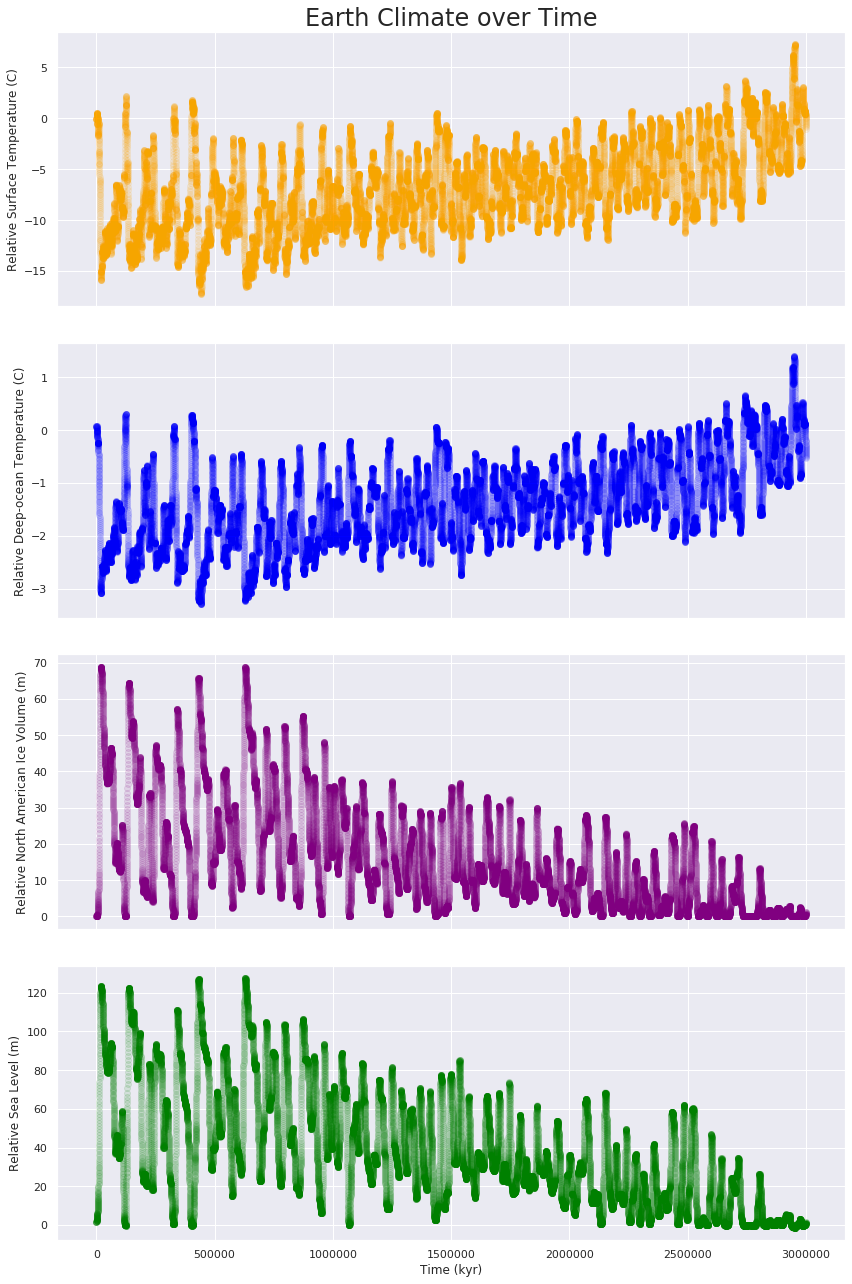

In [56]:
# Put your code in this cell!
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

fig, ax = plt.subplots(4,1, figsize = (12, 18), sharex = True)

ax[0].set_title('Earth Climate over Time', fontsize = 24)
ax[0].scatter(time, Tsurf, color = 'orange', alpha = 0.1)
ax[0].set_ylabel('Relative Surface Temperature (C)')

ax[1].scatter(time, Tdo, color = 'blue', alpha = 0.1)
ax[1].set_ylabel('Relative Deep-ocean Temperature (C)')

ax[2].scatter(time, Ice_nam, color = 'purple', alpha = 0.1)
ax[2].set_ylabel('Relative North American Ice Volume (m)')

ax[3].scatter(time, RSL, color = 'green', alpha = 0.1)
ax[3].set_ylabel('Relative Sea Level (m)')
ax[3].set_xlabel('Time (kyr)')
plt.tight_layout()
plt.show()

Now, make a copy of the previous plot that **zooms in on the last 500,000 years of the dataset.** We'll use this to examine some trends. You can do this by changing the values you feed to the `plt.xlim()` function.

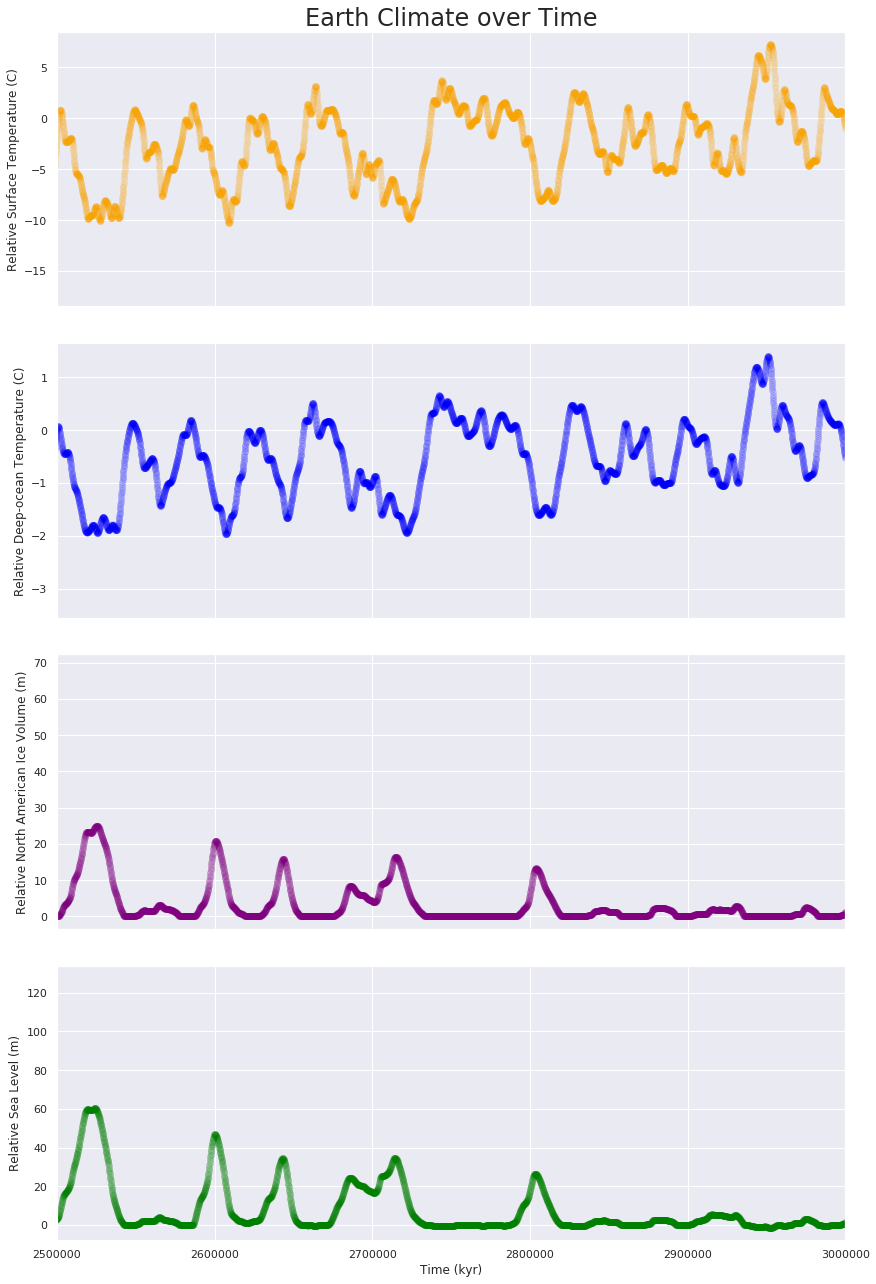

In [62]:
# Put your code in this cell!

fig, ax = plt.subplots(4,1, figsize = (12, 18), sharex = True)

ax[0].set_title('Earth Climate over Time', fontsize = 24)
ax[0].scatter(time, Tsurf, color = 'orange', alpha = 0.1)
ax[0].set_ylabel('Relative Surface Temperature (C)')

ax[1].scatter(time, Tdo, color = 'blue', alpha = 0.1)
ax[1].set_ylabel('Relative Deep-ocean Temperature (C)')

ax[2].scatter(time, Ice_nam, color = 'purple', alpha = 0.1)
ax[2].set_ylabel('Relative North American Ice Volume (m)')

ax[3].scatter(time, RSL, color = 'green', alpha = 0.1)
ax[3].set_ylabel('Relative Sea Level (m)')
ax[3].set_xlabel('Time (kyr)')
plt.tight_layout()

plt.xlim(3000000 - 500000, 3000000)

plt.show()


**Based on the plot you've made, answer the following questions:**

1.  What relationship do you see between the global atmospheric temperature and the deep sea temperature?
2.  What relationship do you see between the global atmospheric temperature and the estimated volume of ice on land?
3.  What relationship do you see between the volume of ice and the estimated sea level?
4.  Do the relationships that you're seeing make sense to you?  Why or why not?
5.  Do you see patterns that repeat in time?  And if so, on what timescales do they seem to occur?

# **Put your answers in this cell!**
1. Direct Relationship
2. Inverse Relationship
3. Direct Relationship
4. Yes, as you increase temperature, more ice will melt, causing an increase in the relative sea level as the ice is melted in the oceans. 
5. I notice that every 100,000 years there is a period where the sea level is very low then spikes, along with the ice volume and the temperature of both the deep ocean and surface. 

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [63]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

&#169; Copyright 2018,  Michigan State University Board of Trustees